# Importing libraries and loading credentials

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

with open("credentials.json", "r") as file:
    creds = json.load(file)

# Creating Database Connection

In [5]:
DATABASE_URL = f"postgresql://{creds['user']}:{creds['password']}@{creds['host']}:{creds['port']}/{creds['database']}"
engine = create_engine(DATABASE_URL)

# Loading Data from a CSV File

In [6]:
file_path = r"C:\Users\Danie\OneDrive\Escritorio\Global Economy Indicators.csv"
df = pd.read_csv(file_path, delimiter=";")
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Uploading Data to PostgreSQL

In [7]:
df.to_sql("economy_raw", engine, if_exists="replace", index=False, method="multi", chunksize=1000)
print("Data loaded into PostgreSQL")

Data loaded into PostgreSQL


# Retrieving Transformed Data from the Database

In [8]:
df_transformed = pd.read_sql("SELECT * FROM economy_indicators_transformed", engine)

# Data Visualizations

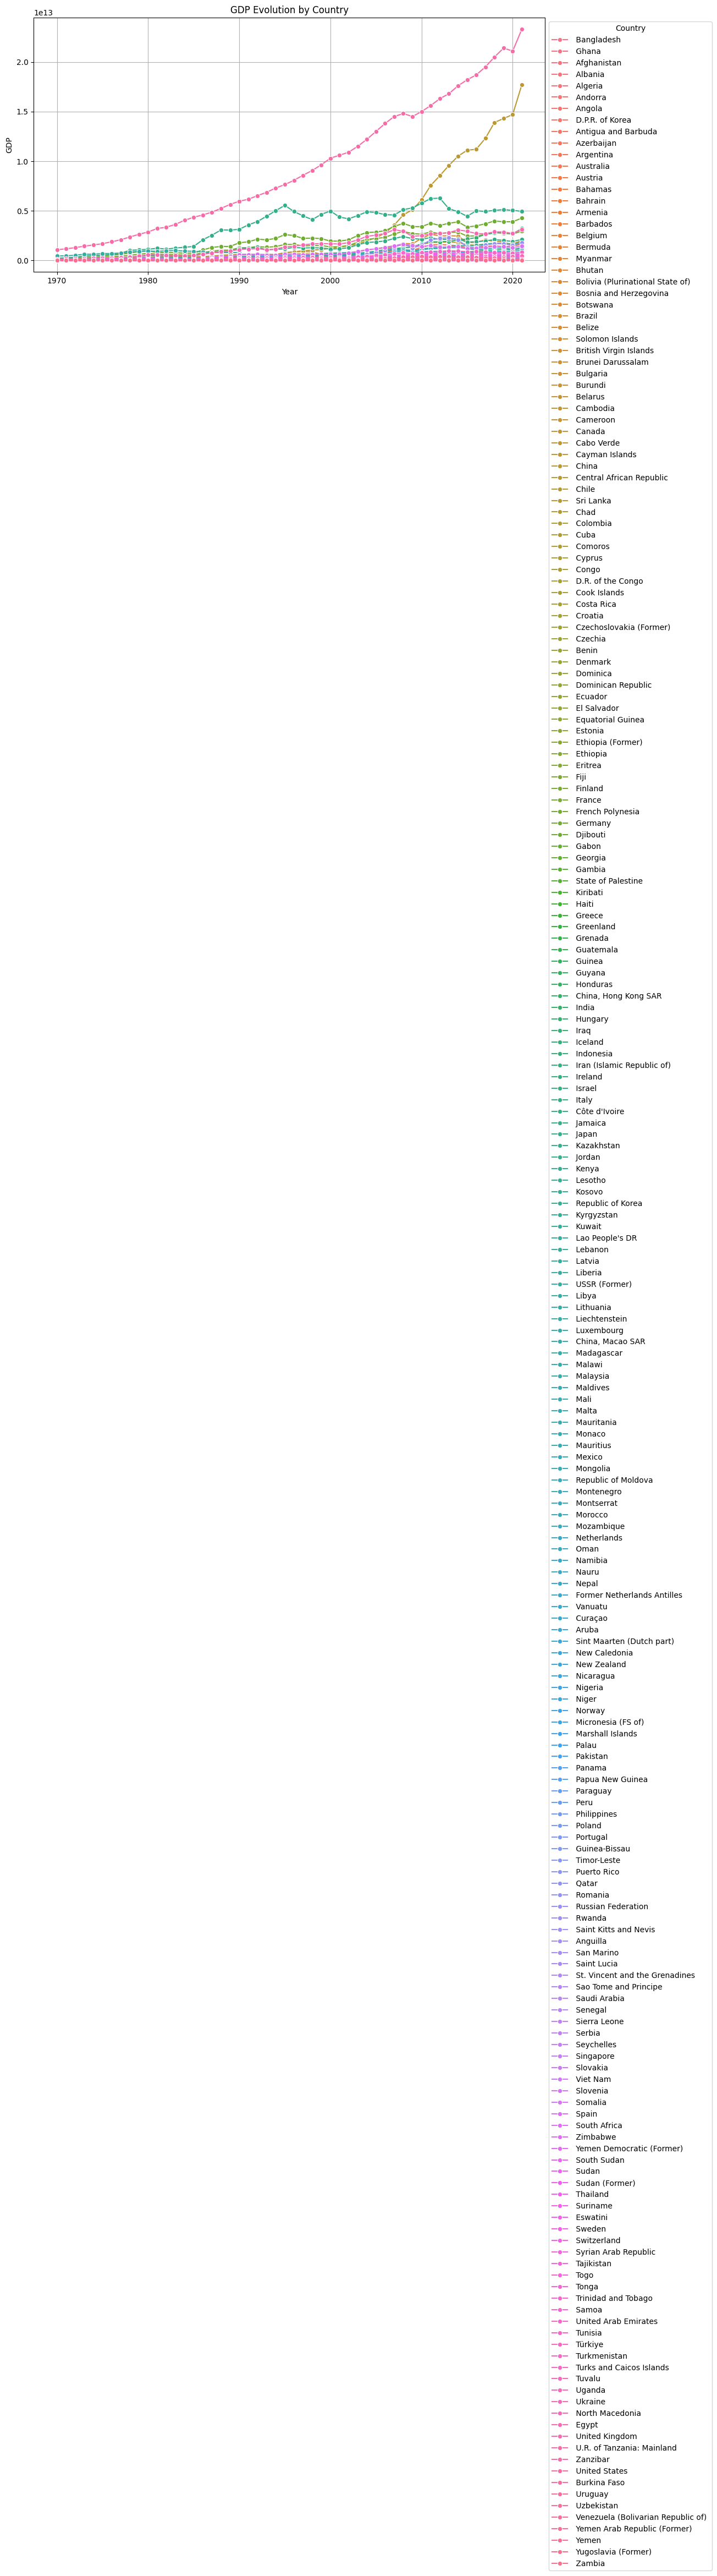

In [9]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_transformed, x="year", y="gdp", hue="country_name", marker="o")
plt.title("GDP Evolution by Country")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.legend(title="Country", bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

# Exchange Rate Comparison

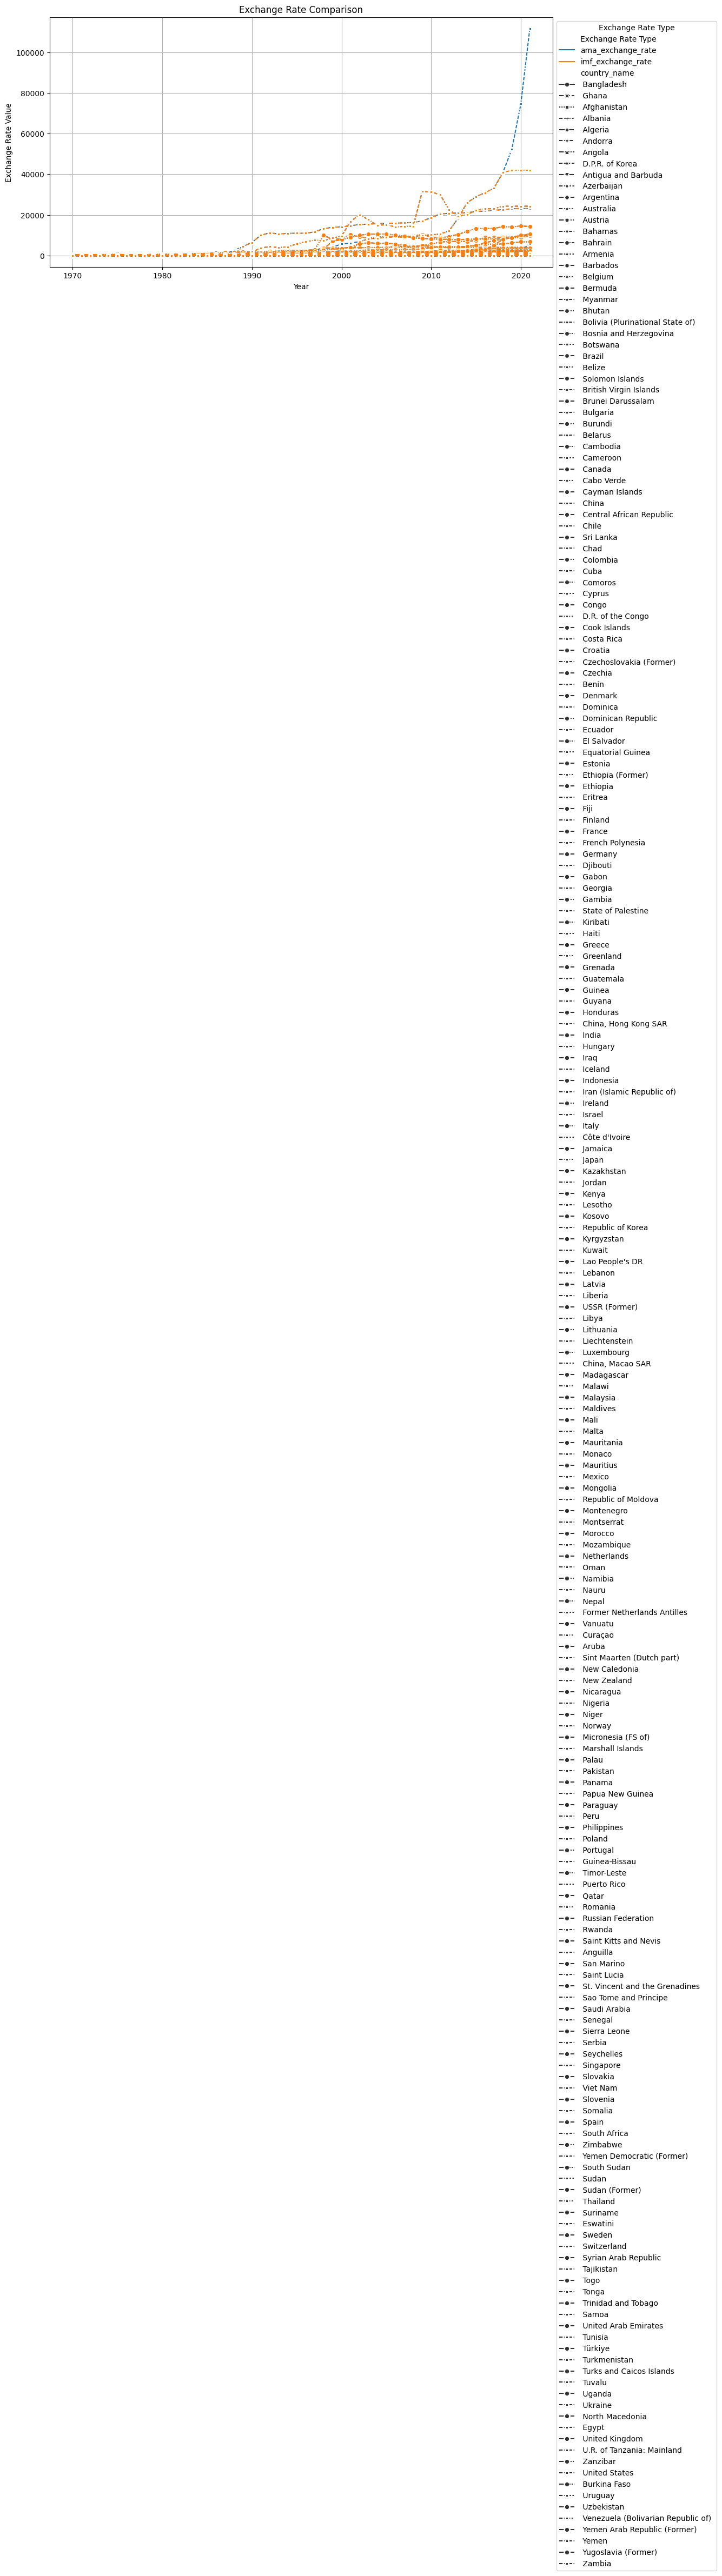

In [10]:
plt.figure(figsize=(12,6))
df_melted = df_transformed.melt(id_vars=["country_name", "year"],
                                value_vars=["ama_exchange_rate", "imf_exchange_rate"],
                                var_name="Exchange Rate Type", value_name="Value")
sns.lineplot(data=df_melted, x="year", y="Value", hue="Exchange Rate Type", style="country_name", markers=True)
plt.title("Exchange Rate Comparison")
plt.xlabel("Year")
plt.ylabel("Exchange Rate Value")
plt.legend(title="Exchange Rate Type", bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

# Relationship between Population and Per Capita GNI

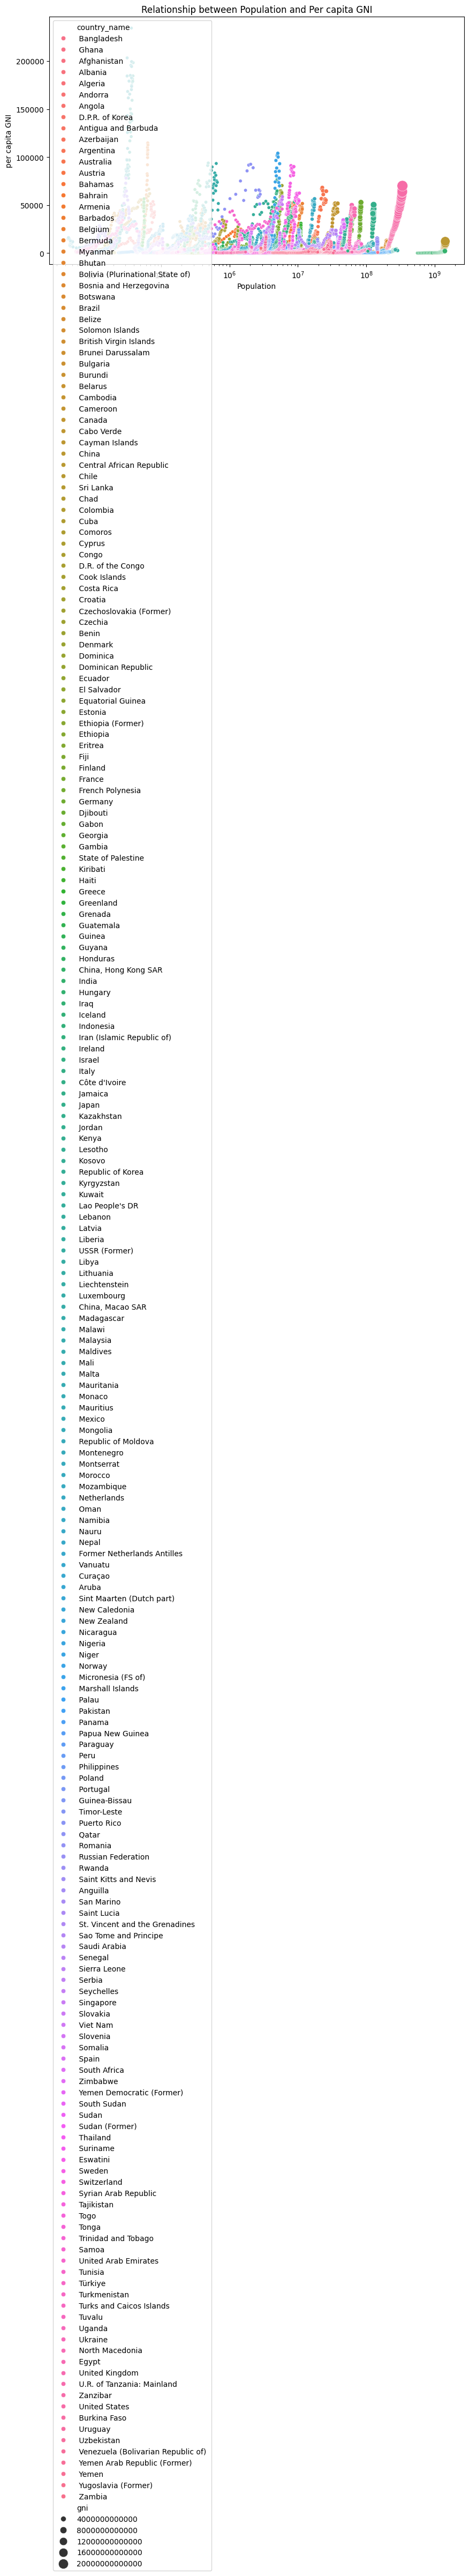

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_transformed, x="population", y="per_capita_gni", hue="country_name", size="gni", sizes=(20, 200))
plt.xscale("log")
plt.title("Relationship between Population and Per capita GNI")
plt.xlabel("Population")
plt.ylabel("per capita GNI")
plt.show()

# Distribution of Household Expenditure

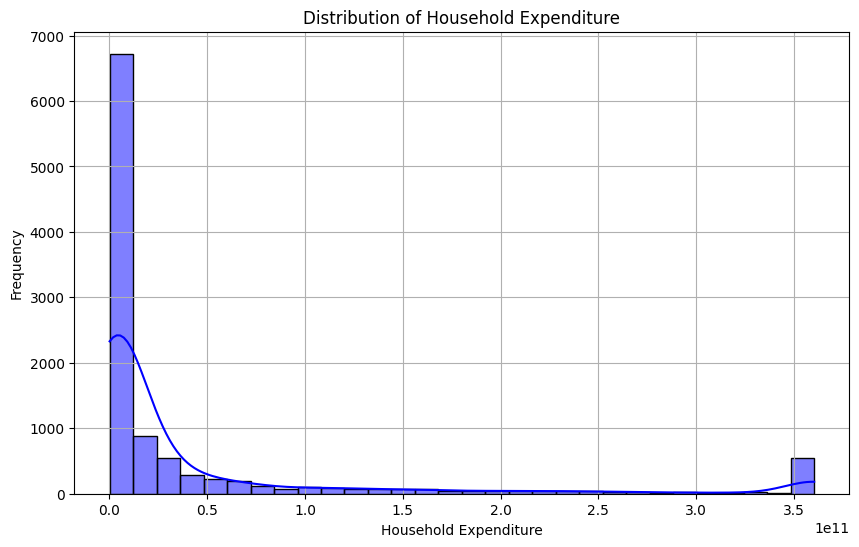

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df_transformed["household_expenditure"], bins=30, kde=True, color="blue")
plt.title("Distribution of Household Expenditure")
plt.xlabel("Household Expenditure")
plt.ylabel("Frequency")
plt.grid()
plt.show()

![](Charts Global Economy Indicators.png)